# Trabajo de Mentoria - DiploDatos - Parte 3

# Grupo A
    
Integrantes: 
    <li> Pamela Pairo
    <li> Bruno Garcia
    <li> Nicolas Chiapello
    <li> Martin Peñas
        

In [119]:
#import missingno as msno
#msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')

In [120]:
import io
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

import pandas as pd

import numpy as np
#import scipy
import seaborn as sns
#seaborn.set_context('talk')

In [121]:
#df2 = pd.read_csv('https://raw.githubusercontent.com/Nicoch590/DatosFinancieros/main/datos_financieros_reducidos.csv',index_col=[0])
df = pd.read_csv('financial_data.csv',index_col=[0])
columns = df.columns

In [122]:
columns = pd.DataFrame(columns)

In [123]:
columns.sort_values(0)
columns.to_excel("columnas.xlsx")

In [124]:
df = df.rename_axis('Ticker').reset_index()

In [125]:
#print(df)

## Puntuacion Piotrosky
Piotrosky es un profesor de la Universidad de Stanford, que creo un parámtro para conocer el comportamiento de las empresas en la bolsa de valores. Le otorga una puntuación entre 0 y 9, y demostro que si se invierte de acuerdo a dicho indice en las empresas con mejor categorización se puede lograr un 13 % de rentabilidad. También es aplicable su utilización para operar a corto (esperando que la acción baje de precio) en las empresas que logren una baja puntuación. Los criterios que suman puntos, son los detallados a continuación:

Profitability Criteria

1. Net Income > 0 (+1)

2. ROA > 0 (+1)

3. CFO > 0 (+1)

4. CFO > Net Income (earnings quality) (+1)

Leverage, Liquidity, and Source of Funds Criteria

5. Long Term Debt Current Year < Long Term Debt Previous Year (decreasing leverage) (+1)

6. Current Ratio Current Year > Current Ratio Previous Year (increasing liquidity) (+1)

7. No new shares issued in the last year (shares dilution) (+1)

Operating Efficiency Criteria

8. Gross Margin CY > Gross Margin PY (+1)

9. Asset Turnover Ratio CY > Asset Turnover Ratio PY (+1)


## Definimos a continuacion la Funcion Piotrosky

In [126]:
def Piotro(df, ticker):
    a = df[df.Ticker.isin([ticker])].sort_values(by="year")
    
     #Net Income > 0 (+1)
    conditionlist1 = [
        (a['Net Income'] > 0 )]
        #(a['Net Income'] < 0 )]
    choicelist1 = [1]
    a['p1'] = np.select(conditionlist1, choicelist1, default=0)

    #ROA > 0 (+1)
    conditionlist2 = [
        (a['returnOnAssets'] >= 0), (a['returnOnAssets'] < 0)]
    choicelist2 = [1, 0]
    a['p2'] = np.select(conditionlist2, choicelist2, default='Not Specified')

    #CFO > 0 (+1)
    conditionlist3 = [
        (a['Operating Cash Flow'] >= 0), (a['Operating Cash Flow'] < 0)]
    choicelist3 = [1, 0]
    a['p3'] = np.select(conditionlist2, choicelist3, default='Not Specified')

    #CFO > Net Income (earnings quality) (+1)
    conditionlist4 = [
        (a['Operating Cash Flow'] >= a['Net Income'])]
    choicelist4 = [1]
    a['p4'] = np.select(conditionlist4, choicelist4, default=0)


    #Long Term Debt Current Year < Long Term Debt Previous Year (decreasing leverage) (+1)
    a['Long-term debt_shift'] =  a['Long-term debt'].shift()

    conditionlist5 = [
        (a['Long-term debt'] >= a['Long-term debt_shift']),(a['Long-term debt'] < a['Long-term debt_shift'])]
    choicelist5 = [0, 1]
    a['p5'] = np.select(conditionlist5, choicelist5, default='Not Specified')

    #Current Ratio Current Year > Current Ratio Previous Year (increasing liquidity) (+1)
    a['currentRatio_shift'] =  a['currentRatio'].shift()

    conditionlist6 = [
        (a['currentRatio'] >= a['currentRatio_shift']),(a['currentRatio'] < a['currentRatio_shift'])]
    choicelist6 = [1, 0]
    a['p6'] = np.select(conditionlist6, choicelist6, default='Not Specified')

    #No new shares issued in the last year (shares dilution) (+1)
    conditionlist7 = [
        (a['Issuance (buybacks) of shares'] >= 0),(a['Issuance (buybacks) of shares'] < 0)]
    choicelist7 = [0, 1]
    a['p7'] = np.select(conditionlist7, choicelist7, default='Not Specified')

    #Gross Margin CY > Gross Margin PY (+1)
    a['Gross Margin_shift'] =  a['Gross Margin'].shift()

    conditionlist8 = [
        (a['Gross Margin'] >= a['Gross Margin_shift']),(a['Gross Margin'] < a['Gross Margin_shift'])]
    choicelist8 = [1, 0]
    a['p8'] = np.select(conditionlist8, choicelist8, default='Not Specified')

    #Asset Turnover Ratio CY > Asset Turnover Ratio PY (+1)
    a['assetTurnover_shift'] =  a['assetTurnover'].shift()

    conditionlist9 = [
        (a['assetTurnover'] >= a['assetTurnover_shift']),(a['assetTurnover'] < a['assetTurnover_shift'])]
    choicelist9 = [1, 0]
    a['p9'] = np.select(conditionlist9, choicelist9, default='Not Specified')

    a['p1'] = pd.to_numeric(a['p1'], downcast="integer")
    a['p2'] = pd.to_numeric(a['p2'])
    a['p3'] = pd.to_numeric(a['p3'])
    a['p4'] = pd.to_numeric(a['p4'])
    a['p5'] = pd.to_numeric(a['p5'], downcast="integer", errors="coerce")
    a['p6'] = pd.to_numeric(a['p6'], downcast="integer", errors="coerce")
    a['p7'] = pd.to_numeric(a['p7'])
    a['p8'] = pd.to_numeric(a['p8'], downcast="integer", errors="coerce")
    a['p9'] = pd.to_numeric(a['p9'], downcast="integer", errors="coerce")

    a["Piotrosky"] = a.p1 + a.p2 + a.p3 + a.p4 + a.p5 + a.p6 + a.p7 + a.p8 + a.p9
    
    return a

### Vemos un ejemplo de los resultados que nos arroja la función Piotrosky

In [129]:
Piotro(df, "IBM")

,Ticker,Revenue,Revenue Growth,...,assetTurnover_shift,p9,Piotrosky
3270,IBM,9.279300e+10,-0.0567,...,NaN,NaN,NaN
7360,IBM,8.174100e+10,-0.1191,...,0.791270,0.0,7.0
12123,IBM,7.991900e+10,-0.0223,...,0.739771,0.0,5.0
17062,IBM,7.913900e+10,-0.0098,...,0.680335,0.0,6.0
17912,IBM,7.959100e+10,0.0057,...,0.631314,1.0,7.0


### Definimos dentro de la siguiente variable los tickers sobre los que queremos conocer el indice Piotrosky

In [127]:
tick = ["AAPL", "IBM", "WMT", "BA"]

In [133]:
b = pd.DataFrame()


for i in tick:
    b = b.append(Piotro(df, i))
    
#b

### En una nueva variable buscamos conocer los promedios del indice Piotrosky de los tickers elegidos

In [130]:
c= b.groupby(["Ticker"])["Piotrosky"].mean()

In [131]:
c

Ticker
AAPL    6.50
BA      6.50
IBM     6.25
WMT     7.75
Name: Piotrosky, dtype: float64

### A continuación observamos de manera extendida los datos en los cuáles se basó el indice y el resultado del indice Piotrosky en la columna llamada de esa manera 

In [135]:
pd.set_option("max_columns", None)
DGnew = b[["Ticker", "Net Income", "returnOnAssets", "Operating Cash Flow", "Long-term debt", 
            "currentRatio", "Issuance (buybacks) of shares", "Gross Margin", "assetTurnover", "p1", "p2",
           "p3", "p4", "p5", "p6", "p7", "p8", "p9", "Piotrosky", "year"]].copy()

#DGnew.to_excel("DGnew.xlsx", 'Hoja de datos')
DGnew

,Ticker,Net Income,returnOnAssets,Operating Cash Flow,Long-term debt,currentRatio,Issuance (buybacks) of shares,Gross Margin,assetTurnover,p1,p2,p3,p4,p5,p6,p7,p8,p9,Piotrosky,year
3234,AAPL,3.951000e+10,1.5369,5.971300e+10,2.898700e+10,1.080,-4.427000e+10,0.3859,0.788457,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014
7324,AAPL,5.339400e+10,1.7092,8.126600e+10,5.332900e+10,1.109,-3.471000e+10,0.4006,0.804956,1,1,1,1,0.0,1.0,1,1.0,1.0,8.0,2015
12084,AAPL,4.568700e+10,0.8326,6.623100e+10,7.542700e+10,1.353,-2.922700e+10,0.3908,0.670340,1,1,1,1,0.0,1.0,1,0.0,0.0,6.0,2016
17022,AAPL,4.835100e+10,0.7847,6.422500e+10,9.720700e+10,1.276,-3.234500e+10,0.3847,0.610771,1,1,1,1,0.0,0.0,1,0.0,0.0,5.0,2017
17691,AAPL,5.953100e+10,1.0497,7.743400e+10,9.373500e+10,1.133,-7.206900e+10,0.3834,0.726215,1,1,1,1,1.0,0.0,1,0.0,1.0,7.0,2018
3270,IBM,1.202200e+10,0.6475,1.686800e+10,3.499100e+10,1.197,-1.297000e+10,0.5001,0.791270,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014
7360,IBM,1.319000e+10,0.6956,1.725500e+10,3.342800e+10,1.240,-4.287000e+09,0.4977,0.739771,1,1,1,1,1.0,1.0,1,0.0,0.0,7.0,2015
12123,IBM,1.187200e+10,0.6437,1.708400e+10,3.465500e+10,1.210,-3.502000e+09,0.4819,0.680335,1,1,1,1,0.0,0.0,1,0.0,0.0,5.0,2016
17062,IBM,5.753000e+09,0.2449,1.672400e+10,3.983700e+10,1.331,-4.340000e+09,0.4668,0.631314,1,1,1,1,0.0,1.0,1,0.0,0.0,6.0,2017
17912,IBM,8.728000e+09,0.4020,1.524700e+10,3.560500e+10,1.286,-4.443000e+09,0.4641,0.645078,1,1,1,1,1.0,0.0,1,0.0,1.0,7.0,2018


In [138]:
DGnew["year2"] = DGnew.year
DGnew["year2"] = DGnew["year2"].map({2014:"2014-12-31", 
                             2015:"2015-12-31", 
                             2016:"2016-12-31", 
                             2017:"2017-12-31", 
                             2018:"2018-12-31"}, na_action=None)


DGnew["year2"] = pd.to_datetime(DGnew["year2"], format="%Y-%m-%d")


In [139]:
DGnew.year2

3234    2014-12-31
7324    2015-12-31
12084   2016-12-31
17022   2017-12-31
17691   2018-12-31
3270    2014-12-31
7360    2015-12-31
12123   2016-12-31
17062   2017-12-31
17912   2018-12-31
7       2014-12-31
3815    2015-12-31
7935    2016-12-31
12732   2017-12-31
17775   2018-12-31
1448    2014-12-31
5357    2015-12-31
9596    2016-12-31
14446   2017-12-31
17810   2018-12-31
Name: year2, dtype: datetime64[ns]

# Resta quitar los años 2014, hacer dibujo con los mejores puntajes. 

In [140]:
import yfinance as yf

def datos(tick):
    data = yf.download(tickers=tick, start= "2014-01-01", end = "2018-03-30", interval = "3mo")
    dataY = data[["Close"]].copy().dropna()
    dataY['tick'] = tick    
    dataY["Date"] = dataY.index
    #dataY.reset_index()

    dataY['year'] = pd.DatetimeIndex(dataY['Date']).year
    dataY['month'] = pd.DatetimeIndex(dataY['Date']).month

    dataX = dataY[dataY["month"] == 1]

    dataX["ClosePrev"] = dataX["Close"].shift()
    dataX["pct"] = dataX["Close"].pct_change()
    
    return dataX


In [141]:
ko = pd.DataFrame()

for i in tick:
    ko = ko.append(datos(i))
    
ko

[*********************100%***********************]  1 of 1 completed


<ipython-input-140-ddce35f4eb85>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX["ClosePrev"] = dataX["Close"].shift()
<ipython-input-140-ddce35f4eb85>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX["pct"] = dataX["Close"].pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close,tick,Date,year,month,ClosePrev,pct
Date,,,,,,,
2014-01-01,19.169287,AAPL,2014-01-01,2014,1,NaN,NaN
2015-01-01,31.107500,AAPL,2015-01-01,2015,1,19.169287,0.622778
2016-01-01,27.247499,AAPL,2016-01-01,2016,1,31.107500,-0.124086
2017-01-01,35.915001,AAPL,2017-01-01,2017,1,27.247499,0.318103
2018-01-01,41.945000,AAPL,2018-01-01,2018,1,35.915001,0.167896
2014-01-01,192.490005,IBM,2014-01-01,2014,1,NaN,NaN
2015-01-01,160.500000,IBM,2015-01-01,2015,1,192.490005,-0.166190
2016-01-01,151.449997,IBM,2016-01-01,2016,1,160.500000,-0.056386
2017-01-01,174.139999,IBM,2017-01-01,2017,1,151.449997,0.149818


## Combinamos los datasets de Piotrosky dados como consigna y el dataset de datos de cotizaciones descargados de Yahoo Finance

In [143]:
#merge = merge[1:]
merge = pd.merge(ko, DGnew, how="inner", on="year")
merge["Rendimiento>0"] = np.where(merge["pct"]>= 0, "si", "no")

In [145]:
merge["Rendimiento>0"].value_counts()

no    40
si    40
Name: Rendimiento>0, dtype: int64

Text(0.5, 1.0, 'Grafico con Indice Piotrosky')

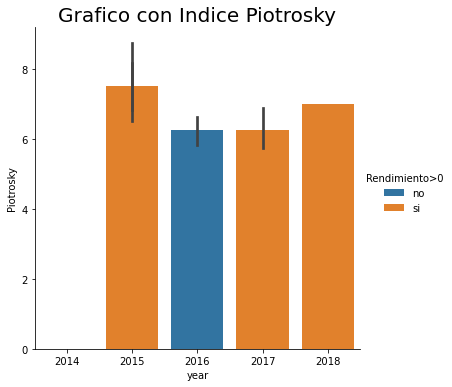

In [172]:
sns.catplot(data=merge, x="year", y = "Piotrosky", hue= "Rendimiento>0", dodge=False, kind="bar", height=5)
plt.title("Grafico con Indice Piotrosky", fontsize=20)
#plt.legend(labels=["Precio bajo con respecto al año anterior", "Precio subio con respecto al año anterior"])

In [171]:
merge

,Close,tick,Date,year,month,ClosePrev,pct,Ticker,Net Income,returnOnAssets,Operating Cash Flow,Long-term debt,currentRatio,Issuance (buybacks) of shares,Gross Margin,assetTurnover,p1,p2,p3,p4,p5,p6,p7,p8,p9,Piotrosky,year2,Rendimiento>0
0,19.169287,AAPL,2014-01-01,2014,1,NaN,NaN,AAPL,3.951000e+10,1.5369,5.971300e+10,2.898700e+10,1.080,-4.427000e+10,0.3859,0.788457,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
1,19.169287,AAPL,2014-01-01,2014,1,NaN,NaN,IBM,1.202200e+10,0.6475,1.686800e+10,3.499100e+10,1.197,-1.297000e+10,0.5001,0.791270,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
2,19.169287,AAPL,2014-01-01,2014,1,NaN,NaN,WMT,1.602200e+10,0.1460,2.325700e+10,4.455900e+10,0.882,-6.683000e+09,0.2482,2.326211,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
3,19.169287,AAPL,2014-01-01,2014,1,NaN,NaN,BA,5.446000e+09,0.1783,8.858000e+09,8.141000e+09,1.405,-5.658000e+09,0.1544,0.976765,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
4,192.490005,IBM,2014-01-01,2014,1,NaN,NaN,AAPL,3.951000e+10,1.5369,5.971300e+10,2.898700e+10,1.080,-4.427000e+10,0.3859,0.788457,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
5,192.490005,IBM,2014-01-01,2014,1,NaN,NaN,IBM,1.202200e+10,0.6475,1.686800e+10,3.499100e+10,1.197,-1.297000e+10,0.5001,0.791270,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
6,192.490005,IBM,2014-01-01,2014,1,NaN,NaN,WMT,1.602200e+10,0.1460,2.325700e+10,4.455900e+10,0.882,-6.683000e+09,0.2482,2.326211,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
7,192.490005,IBM,2014-01-01,2014,1,NaN,NaN,BA,5.446000e+09,0.1783,8.858000e+09,8.141000e+09,1.405,-5.658000e+09,0.1544,0.976765,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
8,76.430000,WMT,2014-01-01,2014,1,NaN,NaN,AAPL,3.951000e+10,1.5369,5.971300e+10,2.898700e+10,1.080,-4.427000e+10,0.3859,0.788457,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no
9,76.430000,WMT,2014-01-01,2014,1,NaN,NaN,IBM,1.202200e+10,0.6475,1.686800e+10,3.499100e+10,1.197,-1.297000e+10,0.5001,0.791270,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014-12-31,no


In [167]:
t

,Close,year,month,ClosePrev,pct,Net Income,returnOnAssets,Operating Cash Flow,Long-term debt,currentRatio,Issuance (buybacks) of shares,Gross Margin,assetTurnover,p1,p2,p3,p4,p5,p6,p7,p8,p9,Piotrosky
tick,,,,,,,,,,,,,,,,,,,,,,,
AAPL,621.537148,40320,20,453.757149,3.938765,4.031960e+11,10.669,6.288150e+11,7.850060e+11,22.843,-3.071010e+11,6.4483,23.839192,20,20,20,20,6.0,5.0,20,7.0,10.0,108.0
BA,3629.000031,40320,20,2317.480011,5.155679,4.031960e+11,10.669,6.288150e+11,7.850060e+11,22.843,-3.071010e+11,6.4483,23.839192,20,20,20,20,6.0,5.0,20,7.0,10.0,108.0
IBM,3328.039978,40320,20,2714.320007,-0.766743,4.031960e+11,10.669,6.288150e+11,7.850060e+11,22.843,-3.071010e+11,6.4483,23.839192,20,20,20,20,6.0,5.0,20,7.0,10.0,108.0
WMT,1552.880005,40320,20,1197.000000,0.782371,4.031960e+11,10.669,6.288150e+11,7.850060e+11,22.843,-3.071010e+11,6.4483,23.839192,20,20,20,20,6.0,5.0,20,7.0,10.0,108.0


# Borrador:

In [ ]:
def Piotrosky(tickerElegido):
    
    filtroPG = df.Ticker == tickerElegido
    DG = df[filtroPG]
    DG.set_index("year",inplace = True)
    DG.reset_index()

    print(tickerElegido["Net Income"])
    print(tickerElegido["returnOnAssets"])

In [ ]:
#Se selecciona el ticker
tickerEleg = "AAPL"
filtroPG = df.Ticker == tickerEleg
DG = df[filtroPG]
DG.set_index("year",inplace = True)
DG.reset_index()
type(DG)
df.set_index("year", inplace=True)
df.reset_index()